Γεώργιος Νικολής
ΑΕΜ: 209
Άσκηση 1

# Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Question 1

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


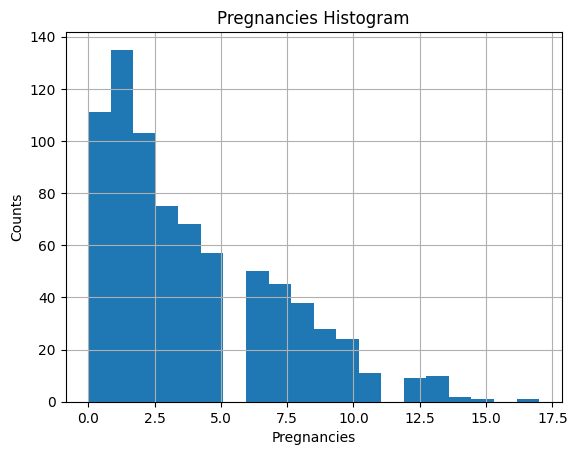

In [5]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

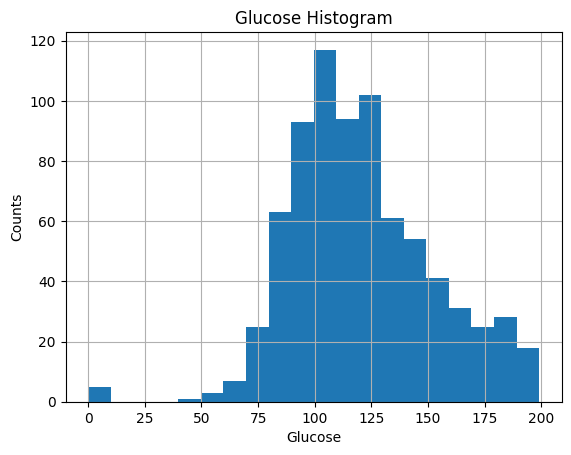

In [6]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

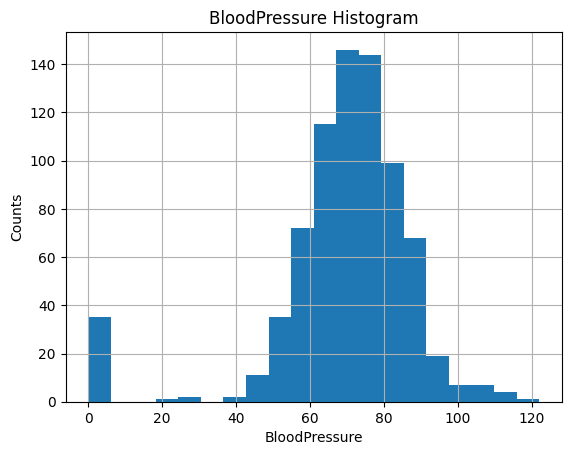

In [7]:
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

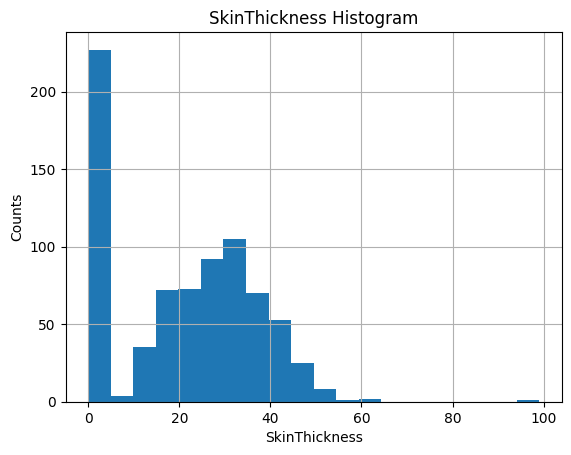

In [8]:
df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

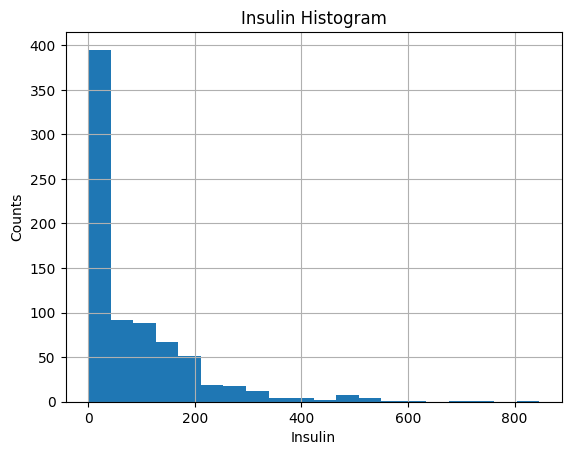

In [9]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

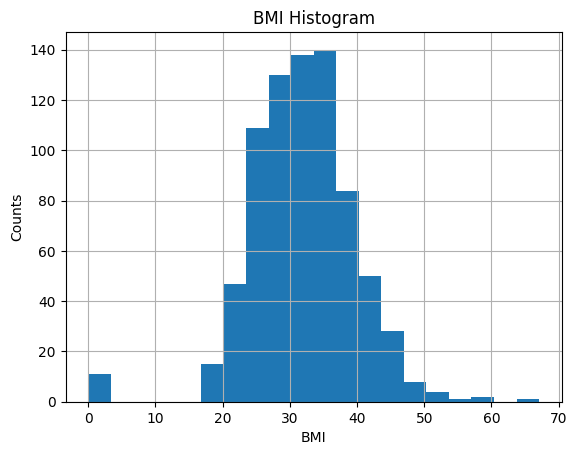

In [10]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

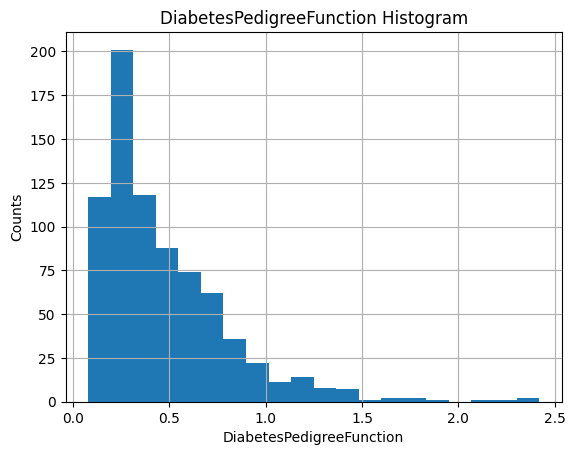

In [11]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

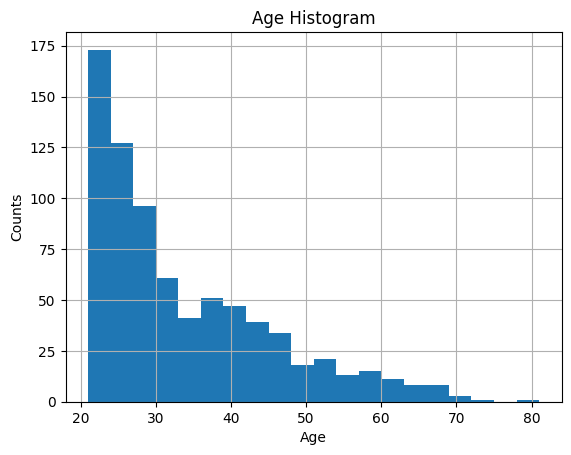

In [12]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

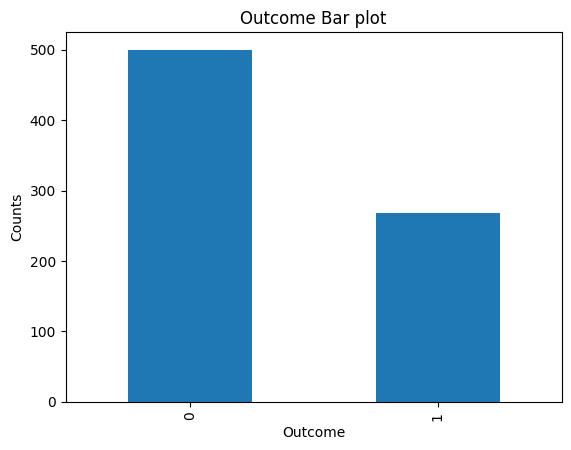

In [13]:
df['Outcome'].value_counts().plot.bar()
plt.title('Outcome Bar plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

# Question 2:

Τα δεδομένα φαίνεται ότι έχουν ακραίες τιμές σε κάποιες μεταβλητές (πχ στο  feature 'Insulin'). Επίσης, έχουν και κάποιες (φαινομενικά) άκυρες τιμές (πχ 0 στο Blood pressure).

Στο διάγραμμα της ηλικίας βλέπουμε ότι δεν έχουμε πολλές παρατηρήσεις για μεγαλύτερες ηλικίες. Ειδικά για ιατρικά προβλήματα αυτό ειναι ιδιαίτερα σημαντικό. Τέλος, θα θέλαμε ιδανικά τον ίδιο αριθμό παρατηρήσεων με Outcome 0 και 1, ώστε να είναι ισορροπημένο το δείγμα.

Σε γενικές γραμμές τα δεδομένα φαίνεται ότι έχουν προβλήματα, όπως συνηθίζεται στα περισσότερα σύνολα.

# Question 3:

Η ηλικία φαίνεται ότι ακολουθεί 'skewed positively' κατανομή. Οι περισσότερες δηλαδή παρατηρήσεις είναι σε μικρή ηλικία. Αυτό δεν είναι καλό, καθώς ιατρικά δεδομένα ενδεχομένως να αλλάζουν σημαντικά ανά ηλικία και επομένως οι μεγαλύτερες ηλικίες δεν αντιπροσωπεύονται επαρκώς στο σύνολο.

# Question 4:

Από το παρακάτω scatter plot φαίνεται γενικά ότι οι υψηλότερες τιμές γλυκόζης ενδεχομένως να υποδεικνύουν την ύπαρξη διαβήτη, όχι όμως απαραίτητα.

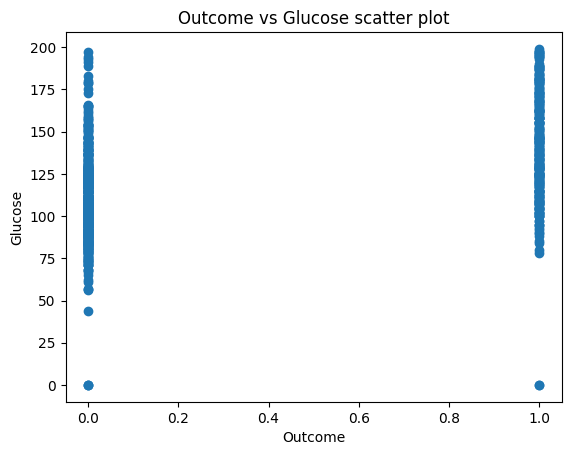

In [14]:
plt.scatter(df['Outcome'], df['Glucose'])
plt.title('Outcome vs Glucose scatter plot')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

# Question 5

In [15]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

In [16]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

# Question 6

In [17]:
model = LogisticRegression(max_iter=1000, random_state=seed)

In [18]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [19]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model for the test set is: {accuracy_percentage}')

The accuracy of the model for the test set is: 77.92


In [21]:
y_pred_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train = round(accuracy_train*100, 2)
print(f'The accuracy of the model for the train set is: {accuracy_percentage_train}')

The accuracy of the model for the train set is: 76.54




Η ακρίβεια του συνόλου ελέχγου είναι παρόμοια με του συνόλου εκπαίδευσης.

In [23]:
df['group_by_age'] = pd.cut(df['Age'], bins = [0,25,50,100], labels = ['0-25','25-50','>50'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,group_by_age
0,6,148,72,35,0,33.6,0.627,50,1,25-50
1,1,85,66,29,0,26.6,0.351,31,0,25-50
2,8,183,64,0,0,23.3,0.672,32,1,25-50
3,1,89,66,23,94,28.1,0.167,21,0,0-25
4,0,137,40,35,168,43.1,2.288,33,1,25-50
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,>50
764,2,122,70,27,0,36.8,0.340,27,0,25-50
765,5,121,72,23,112,26.2,0.245,30,0,25-50
766,1,126,60,0,0,30.1,0.349,47,1,25-50


In [25]:
age_group_acc = df.groupby('group_by_age',observed=True)['Outcome'].mean()
age_group_acc

,Outcome
group_by_age,
0-25,0.168539
25-50,0.440476
>50,0.469136


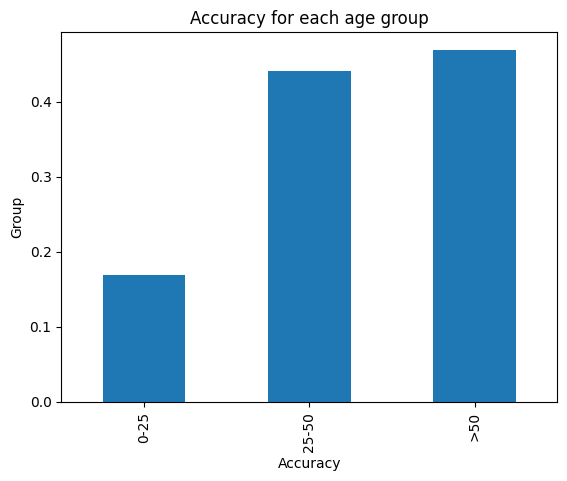

In [27]:
age_group_acc.plot.bar()
plt.title('Accuracy for each age group')
plt.xlabel('Accuracy')
plt.ylabel('Group')
plt.show()

Παρατηρούμε ότι η ακρίβεια δεν είναι ίδια για κάθε ηλικιακό γκρουπ και σε γενικές γραμμές είναι χαμηλή.

# Question 8:

Είναι χειρότερο να έχει ένας ασθενής διαβήτη και το μοντέλο να βγάλει ότι δεν έχει, καθώς δεν γίνεται διάγνωση μια ασθένειας που μπορεί να έχει σοβαρές επιπτώσεις στην υγεία του ασθενή.

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Question 9
training_acc = []
test_acc = []
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=test_size, random_state=seed)
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = round(accuracy*100, 2)
    print(f'The accuracy of the model for the test set is: {accuracy_percentage}')
    test_acc.append(accuracy)

    y_pred_train = model.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_percentage_train = round(accuracy_train*100, 2)
    print(f'The accuracy of the model for the train set is: {accuracy_percentage_train}')
    training_acc.append(accuracy_train)

print(f'Train set score: mean(accuracy)={np.mean(training_acc)}, std(accuracy)={np.std(training_acc)}')
print(f'Test set score: mean(accuracy)={np.mean(test_acc)}, std(accuracy)={np.std(test_acc)}')


The accuracy of the model for the test set is: 76.62
The accuracy of the model for the train set is: 75.79
The accuracy of the model for the test set is: 77.92
The accuracy of the model for the train set is: 76.91
The accuracy of the model for the test set is: 74.46
The accuracy of the model for the train set is: 77.65
The accuracy of the model for the test set is: 72.73
The accuracy of the model for the train set is: 78.58
The accuracy of the model for the test set is: 80.95
The accuracy of the model for the train set is: 74.86
The accuracy of the model for the test set is: 77.49
The accuracy of the model for the train set is: 76.54
The accuracy of the model for the test set is: 79.22
The accuracy of the model for the train set is: 77.09
The accuracy of the model for the test set is: 76.62
The accuracy of the model for the train set is: 77.65
The accuracy of the model for the test set is: 78.79
The accuracy of the model for the train set is: 77.84
The accuracy of the model for the tes

# Question 10

In [33]:
input_df = df.drop(columns=['Outcome','group_by_age'])
targets_df = df['Outcome']
x = input_df.to_numpy()
y = targets_df.to_numpy()
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x.shape, x_scaled.shape , y.shape

((768, 8), (768, 8), (768,))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=test_size, random_state=seed)
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=9)

In [36]:
model.coef_

array([[ 1.46998815,  4.71434832, -0.72588822,  0.20791563, -0.13956125,
         3.1611513 ,  1.38034818,  1.17291191]])

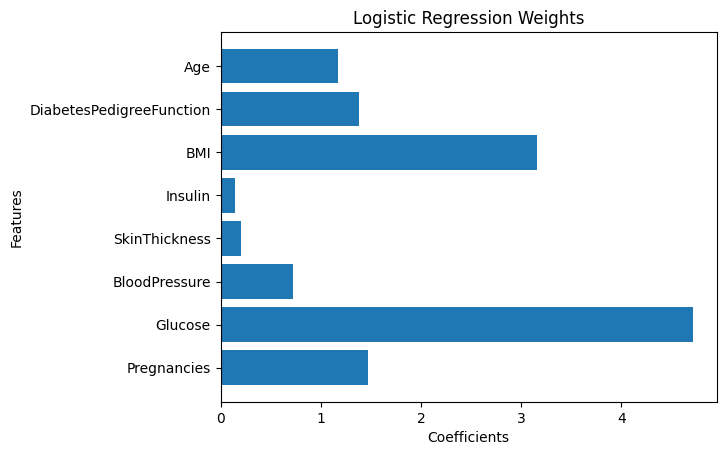

In [37]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()


Κανονικοποίησα τα δεδομένα ώστε να φαίνεται ισότιμα η συνεισφορά κάθε μεταβλητής. Τα πιο ισχυρά βάρη τα έχουν οι μεταβλητές Glucose, BMI και Pregnancies. Αυτό μπορεί να είναι μια ένδειξη ότι είναι οι πιο σημαντικοί παράγοντες που επηρεάζουν το διαβήτη. Ουσιαστικά είναι οι μεταβλητές που συμβάλλουν περισσότερο στη μείωση του σφάλματος κατά την εκπαίδευση. Το εάν προκαλούν ή σχετίζονται άμεσα με διαβήτη ή όχι πρέπει να μελετηθεί περισσότερο από ιατρικής βάσεως.

# Part 2

In [38]:
selected_columns = ['Pregnancies','BloodPressure','BMI','Age','Glucose']
selected_df = df[selected_columns]
selected_df

,Pregnancies,BloodPressure,BMI,Age,Glucose
0,6,72,33.6,50,148
1,1,66,26.6,31,85
2,8,64,23.3,32,183
3,1,66,28.1,21,89
4,0,40,43.1,33,137
...,...,...,...,...,...
763,10,76,32.9,63,101
764,2,70,36.8,27,122
765,5,72,26.2,30,121
766,1,60,30.1,47,126


# Question 1:

In [39]:
#Question 1:
input_df = selected_df.drop(columns=['Glucose'])
targets_df = selected_df['Glucose']
x = input_df.to_numpy()
y = targets_df.to_numpy()
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x.shape , y.shape

((768, 4), (768,))

In [43]:
test_size

0.3

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

In [45]:
reg = LinearRegression().fit(x_train,y_train)

In [46]:
y_pred = reg.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae , mse


(23.599990462075162, 929.8883492746901)

# Question 2:

Καλύτερη μετρική φαίνεται το ΜΑΕ καθώς παίρνει τιμές που είναι εύκολα συγκρίσιμες με τη μεταβλητή που μας ενδιαφέρει και είναι και στις ίδιες μονάδες. Το MSE βλέπουμε ότι παίρνει μεγάλες τιμές που δεν μπορούμε να ερμηνεύσουμε εύκολα, καθώς είναι τα τετράγωνα των σφαλμάτων.

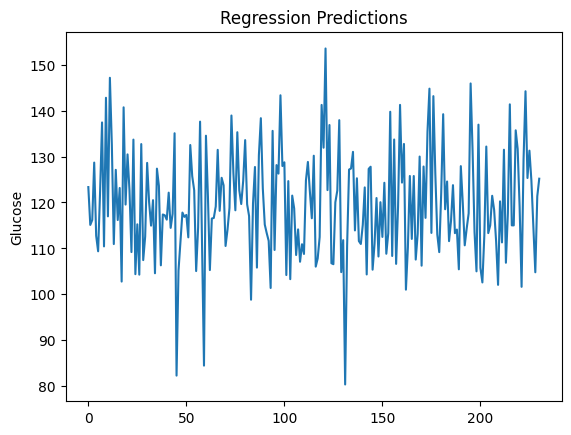

In [48]:
plt.plot(y_pred)
plt.title('Regression Predictions')
plt.ylabel('Glucose')
plt.show()

# Question 3

In [49]:
from sklearn import linear_model

In [50]:
lambas = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracies = []

In [51]:
for l in lambas:
    clf = linear_model.Lasso(alpha=l)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    accuracies.append(mean_absolute_error(y_test, pred))
accuracies

[23.42942518647845,
 23.40934634855705,
 23.558691828607046,
 23.888616884734063,
 24.198513770925086]

# Question 4

In [52]:
reg.coef_

array([-2.85927677,  4.97880057, 63.21349446, 46.10275944])

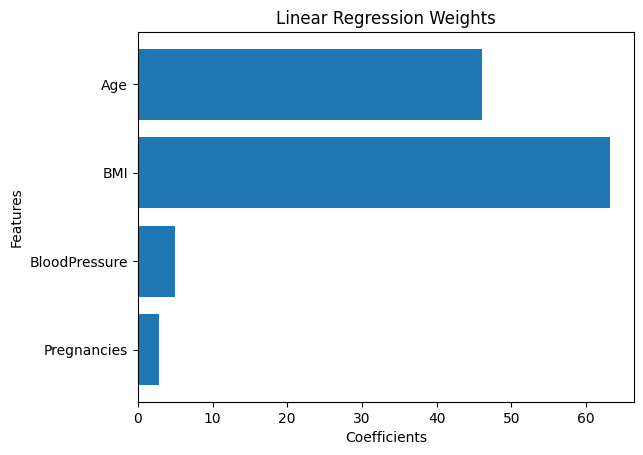

In [53]:
coeffs = reg.coef_
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Linear Regression Weights')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

In [54]:
input_df = selected_df.drop(columns=['Glucose','Pregnancies'])
targets_df = selected_df['Glucose']
x = input_df.to_numpy()
y = targets_df.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
reg = LinearRegression().fit(x_train,y_train)
y_pred = reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mae

23.58760313474184

Η μεταβλητή με το μικρότερο βάρος είναι η Pregnancies. Μετά την αφαίρεση της βλέπουμε ότι το ΜΑΕ μειώθηκε ελάχιστα.